In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from glob import glob
import cv2

In [170]:
doc_paths = glob("C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\*")
print(f'There are {len(doc_paths)} documents in the training set.')
doc_paths[:5]

There are 159999 documents in the training set.


['C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\advertisement0.tif',
 'C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\advertisement1.tif',
 'C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\advertisement10.tif',
 'C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\advertisement100.tif',
 'C:\\Users\\brady\\Downloads\\RVL-CDIP-1\\Training_half\\advertisement1000.tif']

In [171]:
def get_letters(path):
    base = os.path.basename(path).split('.')[0]
    chars = [c for c in base if c.isalpha()]
    return "".join(chars)

def get_numbers(path):
    base = os.path.basename(path).split('.')[0]
    nums = [c for c in base if c.isdigit()]
    return "".join(nums)

def parse_path(path):
    return get_letters(path), get_numbers(path)


In [172]:
paths = {}

for path in doc_paths:
    cat, num = parse_path(path)
    if cat not in paths:
        paths[cat] = []
    paths[cat].append(path)

for cat in paths:
    print(cat, len(paths[cat]))

advertisement 19963
budget 20010
email 19954
filefolder 20022
form 19957
handwritten 20034
invoice 19947
letter 20106
memo 6


# Data Exploration

C:\Users\brady\AppData\Local\Temp\ipykernel_49716\501096733.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


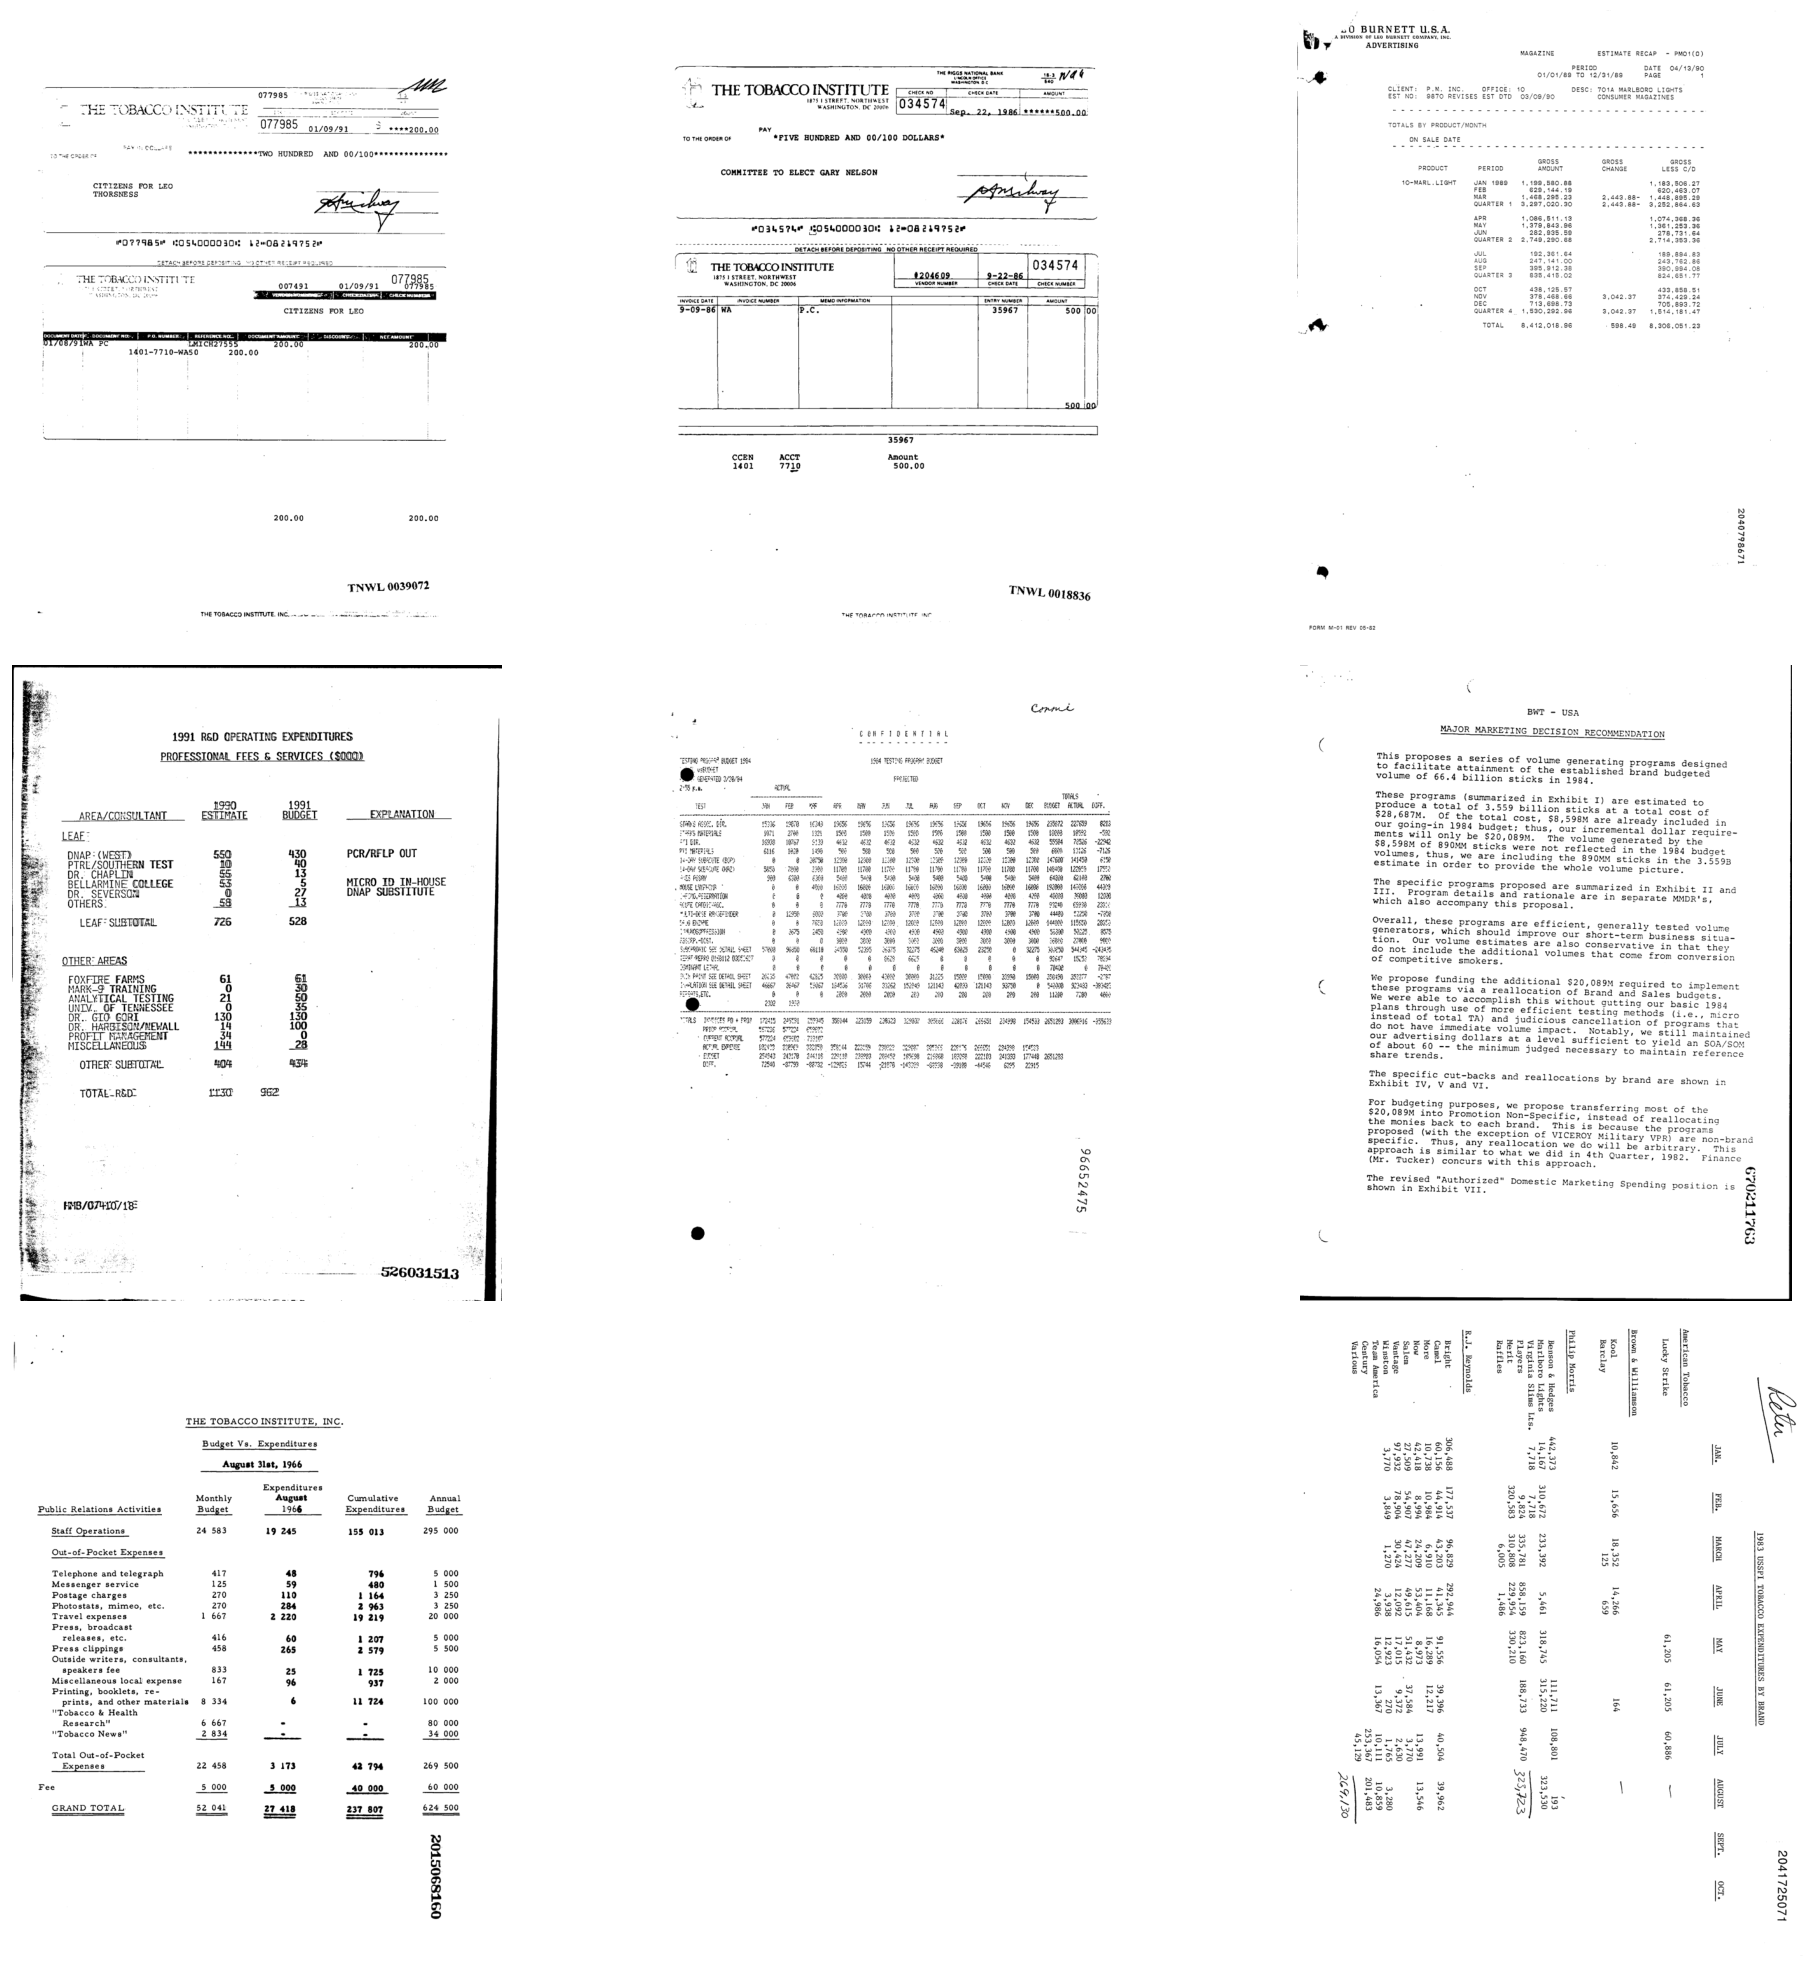

{(783, 1000), (773, 1000), (754, 1000), (830, 1000), (771, 1000), (777, 1000)}


In [147]:
# budget, form (many lines), invoice

def sample_grid(category):
    sample = np.random.choice(paths[category], 9)
    plt.figure(figsize=(20, 20))
    shapes = set()
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img = Image.open(sample[i])
        shapes.add(img.size)
        # use black and white
        plt.imshow(img, cmap='gray')
        plt.tight_layout()
        plt.axis('off')
    plt.show(), print(shapes)

sample_grid('budget')

In [174]:
samples = np.random.choice(paths['invoice'], 1000)
widths = []
heights = set()
for sample in samples:
    img = Image.open(sample)
    w, h = img.size
    widths.append(w)
    heights.add(h)

assert heights == {1000}
assert pd.Series(widths).mode()[0] == 754